---

<h1 style="text-align: center; ">★ NLP - Sentiment Analysis - XM ★</h1>



---

### Dataset Overview
- **Files**: 
  - `train.csv` - Training set with text samples and sentiment categories.
  - `test_features.csv` - Test set with text samples (no target variable).
  - `sample_submission.csv` - Template for correct submission format.

### Columns
- **ID**: Unique identifier for each text sample.
- **Text**: Text samples used for training and prediction.
- **Category**: Sentiment category (target variable) in the training set, represented numerically.

### Initial Exploration
- **Data Inspection**: Check for missing values and correct data types.
- **Text Preprocessing**: Clean text (remove special characters, lowercase, etc.).
- **EDA**: Analyze sentiment distribution and common words.

### Next Steps
- **Model Selection**: Choose and train models (e.g., Logistic Regression, Naive Bayes, LSTM, BERT).
- **Prediction and Submission**: Predict on the test set and format predictions according to `sample_submission.csv`.

--- 


# Img

# **Data Exploration**

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('Dataset/train.csv')
test  = pd.read_csv('Dataset/test_features.csv')


In [3]:
train

,ID,Text,Category
0,969,@JuliaBradbury @SimonCalder @walsop @HodderPRI...,0
1,241,or here https://t.co/R2tO79Easn … .An in house...,1
2,820,@britshmuseum @thehistoryguy Gosh periscope is...,2
3,693,@Ophiolatrist britishmuseum The stupid #French...,1
4,421,@SassyClde We won't stop til @britishmuseum du...,1
...,...,...,...
1595,1131,@tateliverpool Great stuff! I'll be there ASAP...,0
1596,1295,View of L’Estaque by Cézanne atrisk of being e...,3
1597,861,Agreed @rhiannonakelly. Eat my sandwiches @bri...,1
1598,1460,"@BAGcurators @NationalGallery Yes, it is. It'...",2


In [4]:
test

,ID,Text
0,1861,Goodbye @kettlesyard see you in .25 years! htt...
1,354,"@BBC_Culture @PlymouthMuseum Oh dear, why not ..."
2,1334,Fantastic @johnmcdonnellMP standing up for wor...
3,906,"@BBC_Culture @PlymouthMuseum Oh dear, why not ..."
4,1290,@britishmuseum @TripAdvisor it is !
...,...,...
395,966,Unfortunately the transition narrative parts o...
396,1285,#AskTheGallery Love @NationalGallery. Hate Pri...
397,1740,"@CelesteRegal Well, I hope so - but I don't su..."
398,262,@tateliverpool I'm trying to book the members ...


In [5]:
train.drop(columns="ID", inplace= True),test.drop(columns="ID", inplace= True)

(None, None)

In [6]:
train.isnull().sum()

Text        0
Category    0
dtype: int64

In [7]:
train['Category'].value_counts()

Category
1    409
3    404
0    394
2    393
Name: count, dtype: int64

# **Data Visualization**

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

C:\Users\laptop zone\AppData\Local\Temp\ipykernel_18452\1601243810.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=train, x='Category', palette="coolwarm")


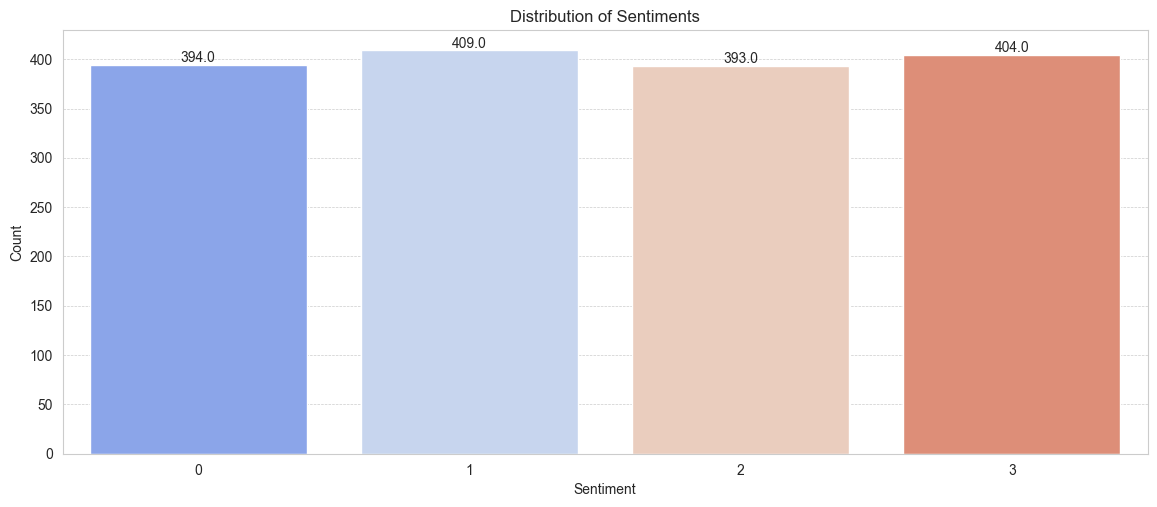

In [9]:
plt.figure(figsize=(14, 5.5))
sns.set_style("whitegrid")

ax = sns.countplot(data=train, x='Category', palette="coolwarm")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                                ha='center', va='bottom')

plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Distribution of Sentiments")
plt.grid(axis='y', linestyle='--', linewidth=0.5)

plt.show()

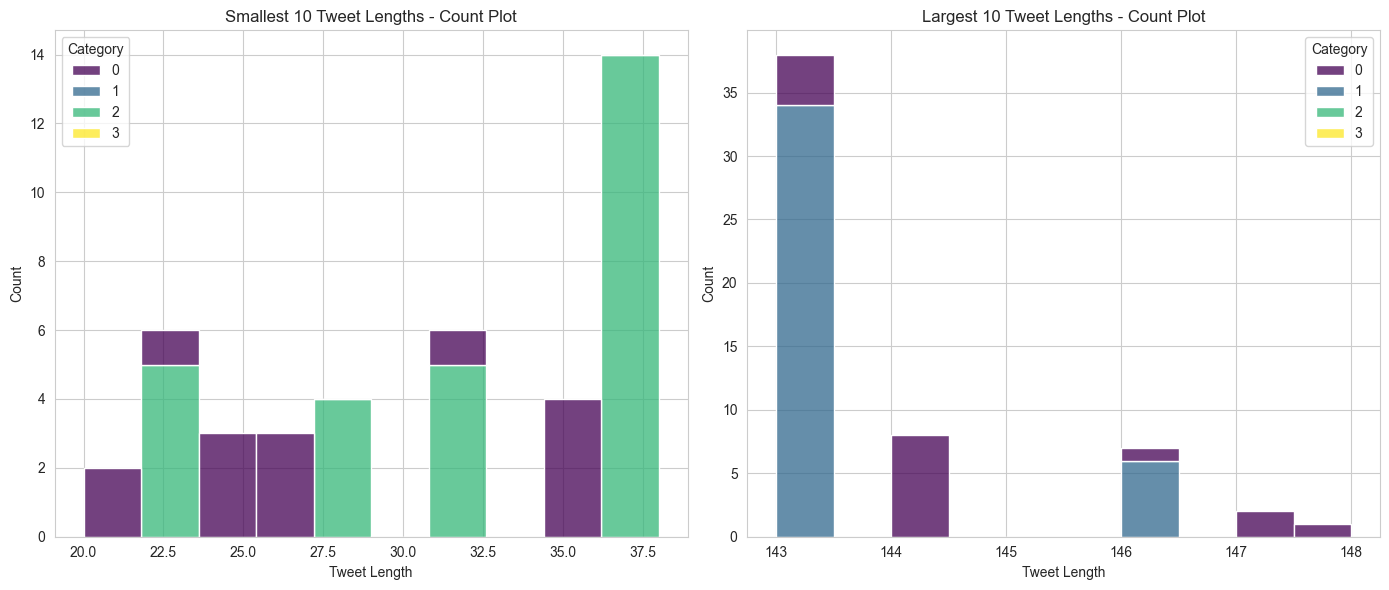

In [10]:
smallest_tweet_lengths = train["Text"].str.len().nsmallest(30).unique()
filtered_data2 = train[train["Text"].str.len().isin(smallest_tweet_lengths)]


largest_tweet_lengths = train["Text"].str.len().nlargest(30).unique()
filtered_data1 = train[train["Text"].str.len().isin(largest_tweet_lengths)]


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(
    x=filtered_data2["Text"].str.len(),    ax=axes[0],
    hue=train["Category"],multiple="stack",
    bins=10,palette="viridis"
)
axes[0].set_title('Smallest 10 Tweet Lengths - Count Plot')
axes[0].set_xlabel('Tweet Length')
axes[0].set_ylabel('Count')

sns.histplot(
    x=filtered_data1["Text"].str.len(), ax=axes[1],
    hue=train["Category"],multiple="stack",
    bins=10, palette="viridis"
)
axes[1].set_title('Largest 10 Tweet Lengths - Count Plot')
axes[1].set_xlabel('Tweet Length')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [11]:
import re
import unicodedata
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import emoji
import nltk

# Downloading NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# To suppress warnings
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to C:\Users\laptop
[nltk_data]     zone\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\laptop
[nltk_data]     zone\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = str(text).lower().strip()

    text = ' '.join([word for word in text.split() if word.lower() not in stop_words])

    text = text.replace('%', ' percent')
    text = text.replace('$', ' dollar ')
    text = text.replace('₹', ' rupee ')
    text = text.replace('€', ' euro ')
    text = text.replace('@', ' at ')

    text = emoji.replace_emoji(text, replace='')

    text = text.replace(',000,000,000 ', 'b ')
    text = text.replace(',000,000 ', 'm ')
    text = text.replace(',000 ', 'k ')
    text = re.sub(r'([0-9]+)000000000', r'\1b', text)
    text = re.sub(r'([0-9]+)000000', r'\1m', text)
    text = re.sub(r'([0-9]+)000', r'\1k', text)

    # Decontract text using a predefined dictionary of contractions
    contractions = { 
        "ain't": "am not",
        "aren't": "are not",
        "can't": "cannot",
        "can't've": "cannot have",
        "'cause": "because",
        # ... include the rest of the contractions here
        "you'll": "you will",
        "you'll've": "you will have",
        "you're": "you are",
        "you've": "you have"
    }

    text_decontracted = []
    for word in text.split():
        word = contractions.get(word, word)
        text_decontracted.append(word)
    text = ' '.join(text_decontracted)

    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    text = BeautifulSoup(text, "html.parser").get_text()

    text = re.sub(r'\W', ' ', text).strip()

    return text


In [13]:
train['Text'].apply(preprocess)

0       at juliabradbury at simoncalder at walsop at h...
1       https   t co r2to79easn      an house solutio ...
2       at britshmuseum at thehistoryguy gosh periscop...
3       at ophiolatrist britishmuseum stupid  french p...
4       at sassyclde stop til at britishmuseum dumps  ...
                              ...                        
1595           at tateliverpool great stuff  i ll asap  0
1596    view lestaque cezanne atrisk exported at fitzm...
1597    agreed at rhiannonakelly  eat sandwiches at br...
1598    at bagcurators at nationalgallery yes  is  har...
1599    at _thewhitechapel  toward parliament square d...
Name: Text, Length: 1600, dtype: object

In [14]:
train['Text'] = train['Text'].apply(preprocess)

# **Feature Extraction using TF-IDF**

In [15]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(train['Text'])
X_test_tfidf = tfidf_vectorizer.transform(test['Text'])
y_train = train["Text"]

    
print("\nTF-IDF feature matrix shape for training data:", X_train_tfidf.shape)
print("TF-IDF feature matrix shape for test data:", X_test_tfidf.shape)




TF-IDF feature matrix shape for training data: (1600, 3291)
TF-IDF feature matrix shape for test data: (400, 3291)


# **Model Training**

In [16]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [17]:
models = {
    'Random Forest': RandomForestClassifier(), 
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "LogisticRegression": LogisticRegression()
}

In [ ]:
y_train = train["Text"]
best_model  = None
Best_acc = 0.0
results = []
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_train_pred = model.predict(X_train_tfidf)
    acc_score = accuracy_score(y_train, y_train_pred)
    results.append({'Model': name, 'Accuracy': acc_score})

    print(f"{name}....\n")
    if acc_score > Best_acc:
        Best_acc = acc_score
        best_model = model

best_model_d = pd.DataFrame(results)



In [ ]:
print(f"Best Model: {best_model}, Accuracy: {Best_acc}")

(RandomForestClassifier(), 1.0)

# **Model Evaluation**

In [67]:
# Model evaluation
print(f"\nTraining Accuracy: {accuracy_score(y_train, y_train_pred):.3f}")
print("\nClassification Report on Training Data:")
print(classification_report(y_train, y_train_pred))


Training Accuracy: 0.974

Classification Report on Training Data:
                                                                                                                                                            precision    recall  f1-score   support

                                                      2 special places  loved going at hornimanmuseum training london  we re regular visitors at rammuseum       1.00      1.00      1.00         1
                    29 rs  cezanne  painting leave uk unless funds raised at fitzmuseum_uk via at an_artnews http   t co vjdnl3xu7c http   t co 0frsdq5lhn       1.00      1.00      1.00         1
                    29 yrs  cezanne  painting lave uk unless funds raised at fitzmuseum_uk via at an_artnews http   t co vjdnl3xu7c http   t co 0frsdq5lhn       1.00      1.00      1.00         1
                    29 yrs  cezanne  painting leave uk unless funds aised at fitzmuseum_uk via at an_artnews http   t co vjdnl3xu7c http   t co 0frs

# **Predict Test Data**

In [31]:

y_test_pred = model.predict(X_test_tfidf)

test_results = test.copy()
test_results['Category'] = y_test_pred

test_results[['ID', 'Text', 'Category']].to_csv('test_features.csv', index=False)


# **Saving the Model**

In [32]:
import joblib
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [20]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler


In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
